Springboard Capstone 02 - Energy Demand prediction based on weather
EDA

In [28]:
#Import libraries
import pandas as pd
import seaborn as sns
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil import tz
from pytz import timezone
import missingno as msno
import matplotlib
from pandas import Grouper
from pandas import concat
from pandas import DataFrame
from windrose import WindroseAxes
import matplotlib.ticker as mtick

In [29]:
#import saved data and convert to datetime object
energy_data = pd.read_csv("data/energy_data.csv")
energy_data['time'] = pd.to_datetime(energy_data['time'], utc=True)
energy_data.set_index('time', inplace=True)
energy_data.head()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,...,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
time,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,0.0,7096.0,...,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41
2015-01-01 01:00:00+01:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,0.0,7096.0,...,71.0,50.0,195.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92
2015-01-01 02:00:00+01:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,0.0,7099.0,...,73.0,50.0,196.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48
2015-01-01 03:00:00+01:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,0.0,7098.0,...,75.0,50.0,191.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32
2015-01-01 04:00:00+01:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,0.0,7097.0,...,74.0,42.0,189.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04


In [30]:
#Returning to issue of converting UTC to local time in Spain
weather_data = pd.read_csv("data/weather_data.csv")
weather_data['dt_iso'] = pd.to_datetime(weather_data['dt_iso'], utc=True)
weather_data.set_index('dt_iso', inplace=True)
weather_data.head()

,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon,temp_uneq
dt_iso,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+01:00,Barcelona,281.625000,281.625000,281.625000,1035,100,7,58,0.0,0.0,0.0,0,800,clear,sky is clear,01n,False
2015-01-01 00:00:00+01:00,Bilbao,269.657312,269.657312,269.657312,1036,97,0,226,0.0,0.0,0.0,0,800,clear,sky is clear,01,False
2015-01-01 00:00:00+01:00,Madrid,267.325000,267.325000,267.325000,971,63,1,309,0.0,0.0,0.0,0,800,clear,sky is clear,01n,False
2015-01-01 00:00:00+01:00,Seville,273.375000,273.375000,273.375000,1039,75,1,21,0.0,0.0,0.0,0,800,clear,sky is clear,01n,False
2015-01-01 00:00:00+01:00,Valencia,270.475000,270.475000,270.475000,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n,False


# 1.0 Weather patterns

In [31]:
weather_data = weather_data.drop(columns=['temp_uneq'])
weather_data.head()

,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
dt_iso,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+01:00,Barcelona,281.625000,281.625000,281.625000,1035,100,7,58,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2015-01-01 00:00:00+01:00,Bilbao,269.657312,269.657312,269.657312,1036,97,0,226,0.0,0.0,0.0,0,800,clear,sky is clear,01
2015-01-01 00:00:00+01:00,Madrid,267.325000,267.325000,267.325000,971,63,1,309,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2015-01-01 00:00:00+01:00,Seville,273.375000,273.375000,273.375000,1039,75,1,21,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2015-01-01 00:00:00+01:00,Valencia,270.475000,270.475000,270.475000,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n


## 1.1 Dealing with Categorical Data

There are several categorical variables including "weather_id", "weather_main", "weather_description" and "weather_icon". In addition, "wind degrees" seems like it could be binned into cardinal driections or something similar. 

## 1.2 Visualizing basic weather data

In [32]:
# un_cities = weather_data['city_name'].unique()
# print(un_cities)
# # There is a leading space in "Barcelona"

[' Barcelona' 'Bilbao' 'Madrid' 'Seville' 'Valencia']


In [33]:
# #Remove leading spaces from "Barcelona"
# weather_data['city_name'] = weather_data['city_name'].str.replace(" ", "")
# weather_data['city_name'].unique()

array(['Barcelona', 'Bilbao', 'Madrid', 'Seville', 'Valencia'],
      dtype=object)

In [34]:
#Convert temp columns to Celcius
weather_data['temp'] = weather_data['temp']-273.15
weather_data['temp_min'] = weather_data['temp_min']-273.15
weather_data['temp_max'] = weather_data['temp_max']-273.15
#Convert temp columns to Farenheit
#weather_data['temp'] = (weather_data['temp']-273.15) * 9/5
print(weather_data.head())

                           city_name      temp  temp_min  temp_max  pressure  \
dt_iso                                                                         
2015-01-01 00:00:00+01:00  Barcelona  8.475000  8.475000  8.475000      1035   
2015-01-01 00:00:00+01:00     Bilbao -3.492687 -3.492687 -3.492687      1036   
2015-01-01 00:00:00+01:00     Madrid -5.825000 -5.825000 -5.825000       971   
2015-01-01 00:00:00+01:00    Seville  0.225000  0.225000  0.225000      1039   
2015-01-01 00:00:00+01:00   Valencia -2.675000 -2.675000 -2.675000      1001   

                           humidity  wind_speed  wind_deg  rain_1h  rain_3h  \
dt_iso                                                                        
2015-01-01 00:00:00+01:00       100           7        58      0.0      0.0   
2015-01-01 00:00:00+01:00        97           0       226      0.0      0.0   
2015-01-01 00:00:00+01:00        63           1       309      0.0      0.0   
2015-01-01 00:00:00+01:00        75         

In [35]:
#subset data for testing out plotting
barca = weather_data[weather_data['city_name'] == "Barcelona"]
wd_mini = barca.loc['2014-12-31': '2015-12-31']
#wd_mini = barca.loc['2014-12-31': '2015-01-31']
wd_mini.head()

,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
dt_iso,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+01:00,Barcelona,8.475,8.475,8.475,1035,100,7,58,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2015-01-01 01:00:00+01:00,Barcelona,8.475,8.475,8.475,1035,100,7,58,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2015-01-01 02:00:00+01:00,Barcelona,8.136,8.136,8.136,1036,100,7,48,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2015-01-01 03:00:00+01:00,Barcelona,8.136,8.136,8.136,1036,100,7,48,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2015-01-01 04:00:00+01:00,Barcelona,8.136,8.136,8.136,1036,100,7,48,0.0,0.0,0.0,0,800,clear,sky is clear,01n


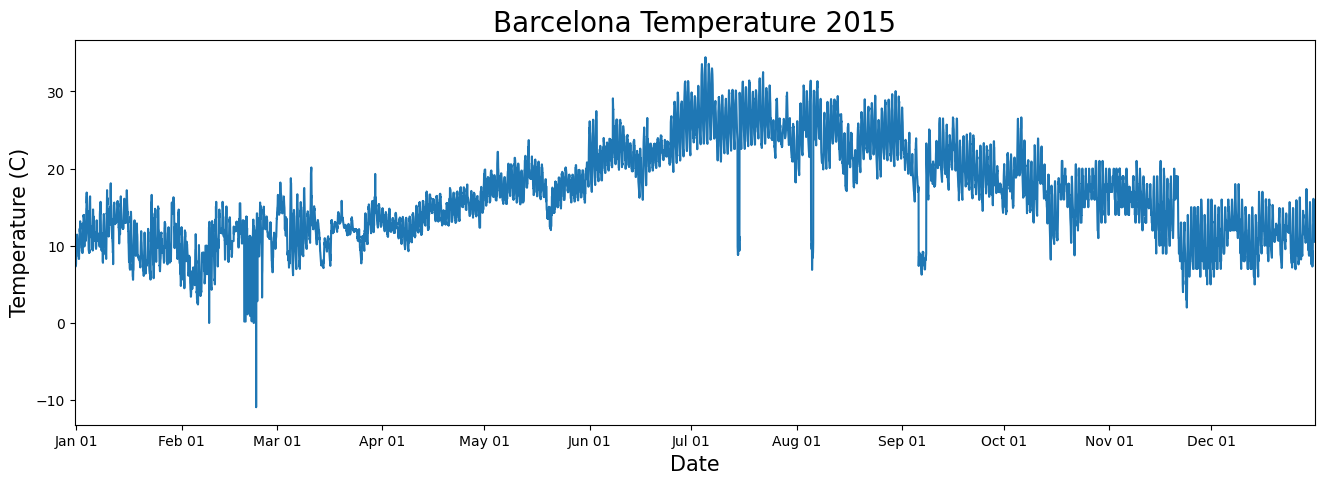

In [36]:
fig, ax = plt.subplots(figsize=(16, 5))
plt.plot(wd_mini.index, wd_mini['temp'])
plt.title('Barcelona Temperature 2015', fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Temperature (C)', fontsize=15)
plt.xlim(wd_mini.index.min(), wd_mini.index.max())

# Defining and displaying time axis ticks
ticks = ['2015-01-01 12:00:00+00:00', '2015-02-01 12:00:00+00:00', '2015-03-01 12:00:00+00:00',
        '2015-04-01 12:00:00+00:00', '2015-05-01 12:00:00+00:00', '2015-06-01 12:00:00+00:00',
        '2015-07-01 12:00:00+00:00', '2015-08-01 12:00:00+00:00', '2015-09-01 12:00:00+00:00',
        '2015-10-01 12:00:00+00:00', '2015-11-01 12:00:00+00:00', '2015-12-01 12:00:00+00:00']
plt.xticks(ticks)

#Formatting x-axis(dates)
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d'))

(755, 12)


Text(0, 0.5, 'Temperature (C)')

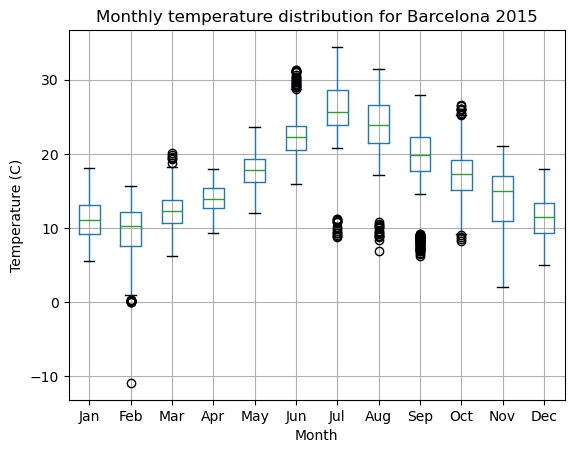

In [37]:
#box plots by month
#series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
#one_year = series['1990']
#barcelona temperatures for the whole year: 24 hours x 365
barc_temp = wd_mini.temp
groups = barc_temp.groupby(Grouper(freq='ME'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
print(months.shape)
#months.columns = range(1,13)
months.columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
months.boxplot()
plt.title("Monthly temperature distribution for Barcelona 2015")
plt.xlabel("Month")
plt.ylabel("Temperature (C)")

Text(0.5, 1.0, 'Windrose for Barcelona 2015')

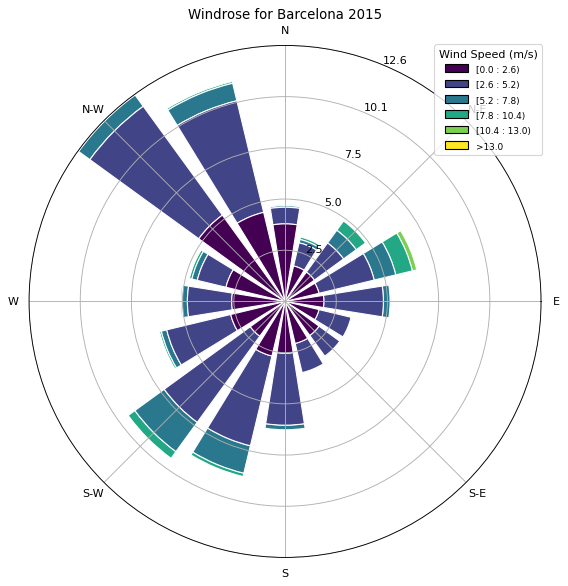

In [38]:
ax = WindroseAxes.from_ax()
ax.bar(wd_mini.wind_deg, wd_mini.wind_speed, normed=True, opening=0.8, edgecolor='white')

# Format radius axis to percentages
# fmt = '%.0f%%' 
# yticks = mtick.FormatStrFormatter(fmt)
# ax.yaxis.set_major_formatter(yticks)

ax.set_legend(title = 'Wind Speed (m/s)', loc='best')
plt.title("Windrose for Barcelona 2015")

In [39]:
#tick_labels = wd_mini.index[13::720]
#print(tick_labels)

In [40]:
# #sns.relplot(x=wd_mini.index, y="temp", data=wd_mini, kind="line")
# sns.lineplot(x=wd_mini.index, y="temp", data=wd_mini)
# #g.locator_params(axis='x', nbins=3)
# #setting tick spacing to be 24 hours* 30 days = 720
# plt.xticks(range(0, len(wd_mini), 720), tick_labels)
# plt.xticks(rotation=45)
# #Trying to format the timestamp to remove the extra time and UTC info
# #plt.gca().xaxis.set_major_formatter(wd_mini.dt_iso.DateFormatter('%Y-%m')) 
# #g.set_xticklabels(['Jan', 'Feb', 'Mar'])
# plt.show()
# # Option 2
# #barca = weather_data.loc[weather_data['city_name'] == "Barcelona"]
# #print(barca.head())
# #_ = sns.replot(x=weather_data.index

In [41]:
# wd_mini2 = weather_data.loc['2014-12-31': '2015-03-31']
# cities = wd_mini2['city_name'].unique()
# for i in range(len(cities)):
#     ya = wd_mini2[wd_mini2['city_name'] == cities[i]]['temp']
#     xa = wd_mini2.loc[wd_mini2['city_name'] == cities[i]].index
#     #print("ya length: ", len(ya))
#     #print("xa length: ", len(xa))   
#     sns.lineplot(x=xa, y=ya)
# plt.xticks(range(0, int(len(wd_mini2)/5), 720))
# plt.xticks(rotation=90)
# plt.legend()
# plt.show()

1. What are the trends in energy data? What are the trends in weather data?
2. Were there any weather trends over the 4 years (e.g. were temperatures up on average? more wind on average? Features to check: temp, humidity, windspeed, rain_1h, rain_3h, snow, cloudiness? maybe weather id or something like that?
3. Maybe - break out each city into its own df - plot the 4 years with mean to compare the city to itself.
4. Maybe calculate mean temperatures per month and graph those?
5. Maybe use that DC "Viusalizing patterns over time" plot? https://campus.datacamp.com/courses/exploratory-data-analysis-in-python/relationships-in-data?ex=1
6. Or box plots for each feature? Although it might be weird given seasonability.
7. How to graph changes year to year?
8. (General) how best to pair down the data to visualize more easily?
9. How do the temperatures in each city relate to the other cities?
10. Any significant items/outliers in terms of MW for energy and values for  weather?
11. Is it possible to determine what the target variable is and the independent variables?
12. What is the hypothesis?
13. Ultimately want to find relationships between weather and generation. 

In [42]:
weather_data.head()

,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
dt_iso,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+01:00,Barcelona,8.475000,8.475000,8.475000,1035,100,7,58,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2015-01-01 00:00:00+01:00,Bilbao,-3.492687,-3.492687,-3.492687,1036,97,0,226,0.0,0.0,0.0,0,800,clear,sky is clear,01
2015-01-01 00:00:00+01:00,Madrid,-5.825000,-5.825000,-5.825000,971,63,1,309,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2015-01-01 00:00:00+01:00,Seville,0.225000,0.225000,0.225000,1039,75,1,21,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2015-01-01 00:00:00+01:00,Valencia,-2.675000,-2.675000,-2.675000,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n


## 2.1 Visualizing basic energy data

In [43]:
energy_data.head()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,...,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
time,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,0.0,7096.0,...,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41
2015-01-01 01:00:00+01:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,0.0,7096.0,...,71.0,50.0,195.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92
2015-01-01 02:00:00+01:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,0.0,7099.0,...,73.0,50.0,196.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48
2015-01-01 03:00:00+01:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,0.0,7098.0,...,75.0,50.0,191.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32
2015-01-01 04:00:00+01:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,0.0,7097.0,...,74.0,42.0,189.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04


In [44]:
#Subset data without forcast, totals or price data
non_gen = ["forecast solar day ahead", "forecast wind onshore day ahead", "total load forecast", "total load actual", "price day ahead", "price actual"]
energy_gen = energy_data.drop(columns = non_gen)
energy_gen.columns = energy_gen.columns.str.replace("generation ", "")
energy_gen.head()

,biomass,fossil brown coal/lignite,fossil gas,fossil hard coal,fossil oil,hydro pumped storage consumption,hydro run-of-river and poundage,hydro water reservoir,marine,nuclear,other,other renewable,solar,waste,wind onshore
time,,,,,,,,,,,,,,,
2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,6378.0
2015-01-01 01:00:00+01:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,0.0,7096.0,43.0,71.0,50.0,195.0,5890.0
2015-01-01 02:00:00+01:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,0.0,7099.0,43.0,73.0,50.0,196.0,5461.0
2015-01-01 03:00:00+01:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,0.0,7098.0,43.0,75.0,50.0,191.0,5238.0
2015-01-01 04:00:00+01:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,0.0,7097.0,43.0,74.0,42.0,189.0,4935.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'biomass'),
  Text(1, 0, 'fossil brown coal/lignite'),
  Text(2, 0, 'fossil gas'),
  Text(3, 0, 'fossil hard coal'),
  Text(4, 0, 'fossil oil'),
  Text(5, 0, 'hydro pumped storage consumption'),
  Text(6, 0, 'hydro run-of-river and poundage'),
  Text(7, 0, 'hydro water reservoir'),
  Text(8, 0, 'marine'),
  Text(9, 0, 'nuclear'),
  Text(10, 0, 'other'),
  Text(11, 0, 'other renewable'),
  Text(12, 0, 'solar'),
  Text(13, 0, 'waste'),
  Text(14, 0, 'wind onshore')])

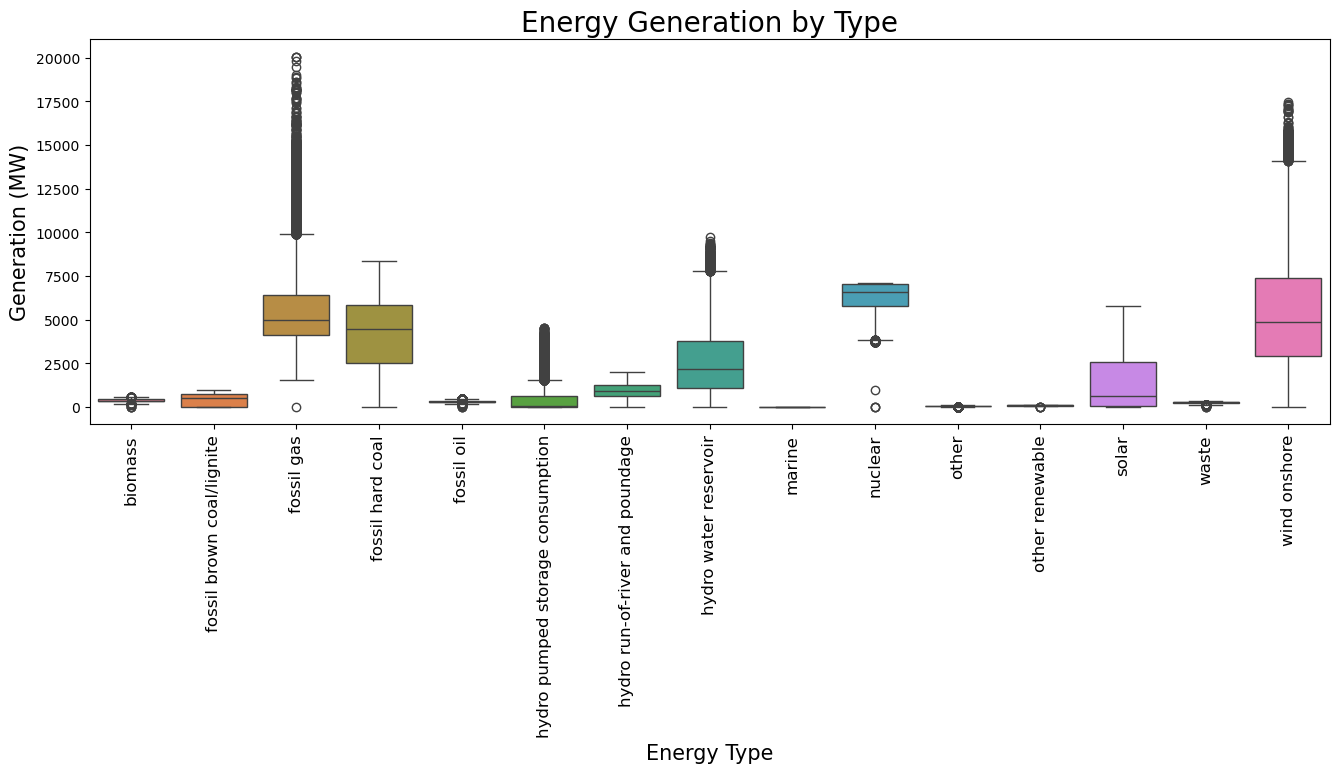

In [45]:
fig, ax = plt.subplots(figsize=(16, 5))
sns.boxplot(data=energy_gen)
plt.title('Energy Generation by Type', fontsize=20)
plt.xlabel('Energy Type', fontsize=15)
plt.ylabel('Generation (MW)', fontsize=15)
plt.xticks(fontsize=12, rotation=90)

In [46]:
eng_mini = energy_gen.loc['2015-01-01': '2015-12-31']

In [47]:
#months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']  # values of the x-axis
# Defining and displaying time axis ticks
ticks = eng_mini.index
#plt.xticks(ticks)

#Formatting x-axis(dates)
#ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d'))
#members = df_transposed.columns  # name of the x-mens for the legend
eng_type = eng_mini.columns  # name of the x-mens for the legend
#below is a nested list of the column values, e.g. [61, 35, 20, 23], [62, 38, 9, 10], [63, 69, 56, 9]...
gen_list = eng_mini.T.values.tolist()  # values of the x-men

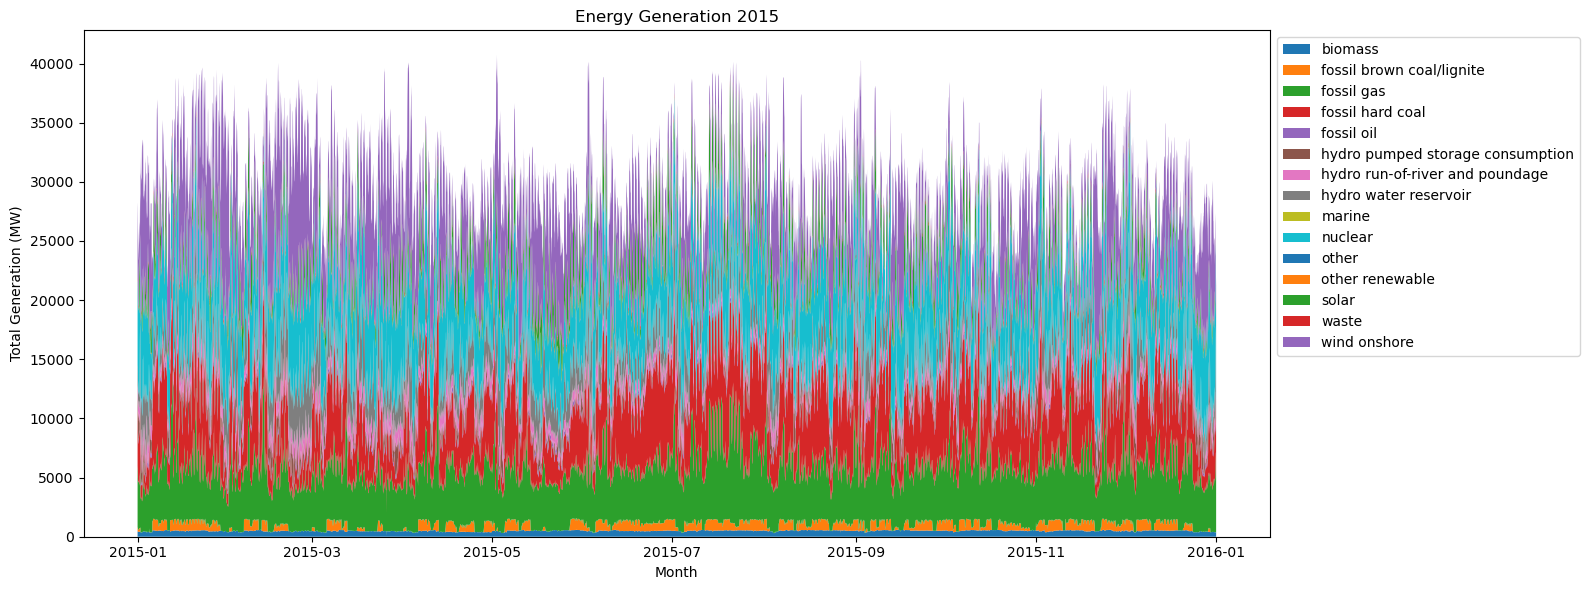

In [48]:
#simple plot

fig, ax = plt.subplots(figsize=(16, 6))
ax.stackplot(ticks, gen_list, labels=eng_type)
ax.set_title('Energy Generation 2015')
ax.set_ylabel('Total Generation (MW)')
ax.set_xlabel('Month')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

fig.tight_layout()
plt.show()

C:\Users\keral\AppData\Local\Temp\ipykernel_15792\2104882138.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eng_mini['hour'] = eng_mini.index.hour


<Axes: xlabel='hour', ylabel='fossil gas'>

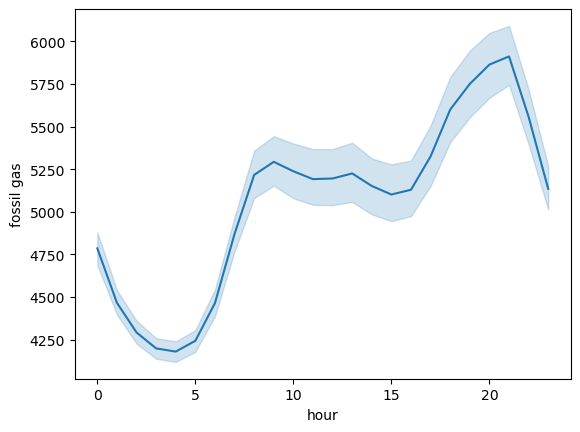

In [49]:
eng_mini['hour'] = eng_mini.index.hour
#print(eng_mini.head())
sns.lineplot(data=eng_mini, x=eng_mini.hour, y="fossil gas")

In [53]:
energy_data.index.max()

                           generation biomass  \
time                                            
2015-01-01 00:00:00+01:00               447.0   
2015-01-01 01:00:00+01:00               449.0   
2015-01-01 02:00:00+01:00               448.0   
2015-01-01 03:00:00+01:00               438.0   
2015-01-01 04:00:00+01:00               428.0   

                           generation fossil brown coal/lignite  \
time                                                              
2015-01-01 00:00:00+01:00                                 329.0   
2015-01-01 01:00:00+01:00                                 328.0   
2015-01-01 02:00:00+01:00                                 323.0   
2015-01-01 03:00:00+01:00                                 254.0   
2015-01-01 04:00:00+01:00                                 187.0   

                           generation fossil gas  generation fossil hard coal  \
time                                                                            
2015-01-01 00:00:00+01:0

## IN PLOT BELOW - TICKS ARE NOT EVENLY SPACED

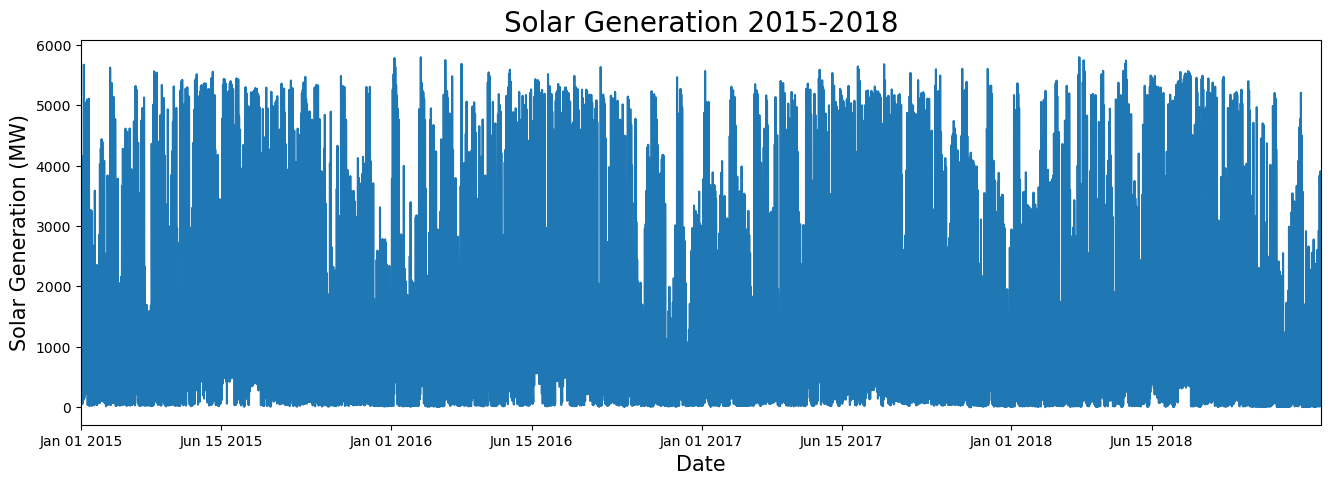

In [60]:
#Plot line plot of solar generation info
fig, ax = plt.subplots(figsize=(16, 5))
plt.plot(energy_data.index, energy_data['generation solar'])
#plt.scatter(energy_data.index, energy_data['generation solar'], alpha=0.2)
plt.title('Solar Generation 2015-2018', fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Solar Generation (MW)', fontsize=15)
plt.xlim(energy_data.index.min(), energy_data.index.max())

# Defining and displaying time axis ticks
ticks = ['2015-01-01 12:00:00+00:00', '2015-06-15 12:00:00+00:00', '2016-01-01 12:00:00+00:00',
        '2016-06-15 12:00:00+00:00', '2017-01-01 12:00:00+00:00', '2017-06-15 12:00:00+00:00',
        '2018-01-01 12:00:00+00:00', '2018-06-15 12:00:00+00:00']
plt.xticks(ticks)

#Formatting x-axis(dates)
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d %Y'))